In [1]:
import utils
import Simple_CNN

import matplotlib.pyplot as plt

import torch
import torchsummary
from torchvision import transforms

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split

from torch.utils.data import DataLoader

from sklearn.preprocessing import OneHotEncoder


import numpy as np
from importlib import reload

import yaml

In [2]:
with open("SimpleCNN.yaml", "r") as f:
  net_archi = yaml.load(f, Loader=yaml.FullLoader)
  
  print(net_archi)

{'SimpleCNN2out': {'conv_channels': [8, 16, 32, 16, 8, 4], 'conv_kernel_size': [2, 2, 2, 2, 2, 2], 'pooling_size': [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], 'linear_features': [64], 'last_layer_activation': 'Softmax(dim=0)'}, 'SimpleCNN1out': {'conv_channels': [8, 16, 32, 16, 8, 4], 'conv_kernel_size': [2, 2, 2, 2, 2, 2], 'pooling_size': [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], 'linear_features': [64], 'last_layer_activation': 'Sigmoid()'}}


In [3]:
# Parameters
random_seed = 42

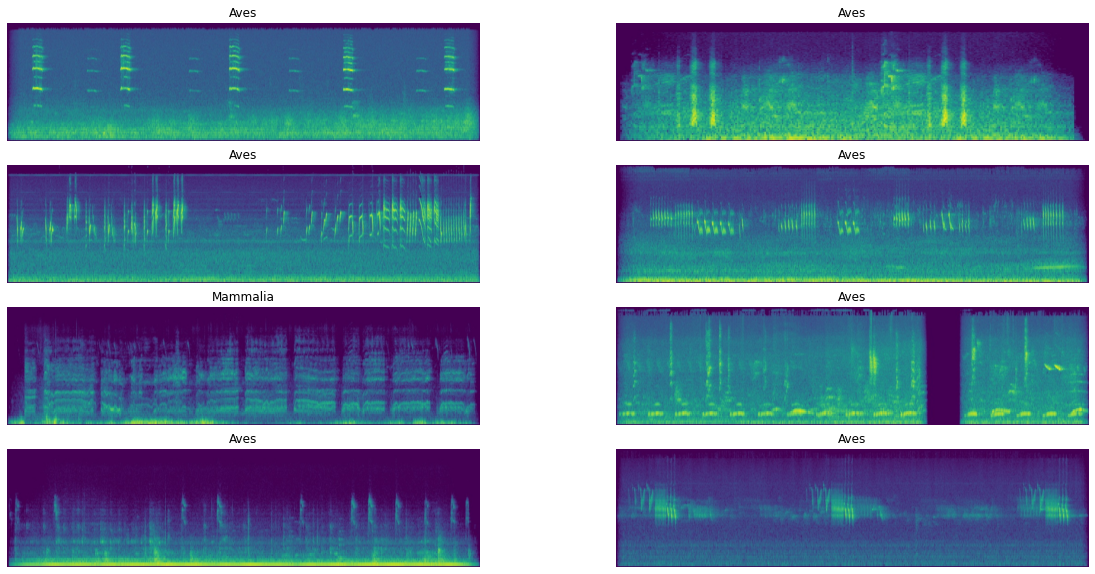

In [4]:
reload(utils)

transform_img = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ]
)

transform_labels = transforms.Compose(
    [transforms.ToTensor()]
)

dataset = utils.SpectrogramDataset("../datasets/Aves-Mammalia.csv", 
                                   "../spectrograms/small_dataset", 
                                   "gbifID", "class", 
                                   transform=transform_img, 
                                   one_hot_encode_labels=True)
dataset.show_sample(8, figsize=(20, 10))

In [5]:
test_percentage = .2
test_len = int((len(dataset) * test_percentage))
train_len = len(dataset) - test_len

train, test = random_split(dataset, [train_len, test_len], torch.Generator().manual_seed(random_seed))

train_loader = DataLoader(train, batch_size=16)
test_loader = DataLoader(test, batch_size=16)

In [6]:
len(train_loader.dataset), len(test_loader.dataset)

(1600, 400)

In [7]:
net_archi["SimpleCNN2out"]

{'conv_channels': [8, 16, 32, 16, 8, 4],
 'conv_kernel_size': [2, 2, 2, 2, 2, 2],
 'pooling_size': [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]],
 'linear_features': [64],
 'last_layer_activation': 'Softmax(dim=0)'}

In [34]:
reload(Simple_CNN)
net = Simple_CNN.SimpleCNN(3, [1024, 256], 2, net_archi["SimpleCNN2out"])

net = utils.cuda_network(net)

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=.001)

# torchsummary.summary(net, (3, 1024, 256))

CUDA available: converting network to CUDA


In [ ]:
torch.cuda.empty_cache()
net.fit(5, train_loader, test_loader, criterion, optimizer, log_file="test.txt")

 80%|████████████████████████████████████         | 4/5 [00:47<00:11, 11.81s/it]

In [ ]:
a = torch.Tensor([[1, 2], [3, 4]])
a.shape, a.cuda().shape

In [ ]:
x, y = iter(test_loader).next().values()

out = net(utils.get_cuda(x))

x.shape, y.shape, out.shape

In [ ]:
for i, j in zip(y, out):
  print(i, j)

In [ ]:
a = out.int()

_, b = torch.max(y, 1)

a, b

In [10]:
torchsummary.summary(net, (3, 1024, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 8, 1024, 256]             104
         MaxPool2d-2          [-1, 8, 512, 128]               0
              ReLU-3          [-1, 8, 512, 128]               0
            Conv2d-4         [-1, 16, 512, 128]             528
         MaxPool2d-5          [-1, 16, 256, 64]               0
              ReLU-6          [-1, 16, 256, 64]               0
            Conv2d-7          [-1, 32, 256, 64]           2,080
         MaxPool2d-8          [-1, 32, 128, 32]               0
              ReLU-9          [-1, 32, 128, 32]               0
           Conv2d-10          [-1, 16, 128, 32]           2,064
        MaxPool2d-11           [-1, 16, 64, 16]               0
             ReLU-12           [-1, 16, 64, 16]               0
           Conv2d-13            [-1, 8, 64, 16]             520
        MaxPool2d-14             [-1, 8